# Computer EX1 - Image Processing
## Ido Shenbach - 318653789
## עדו שנבך - 318653789

Importing relevant packeges

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Question 1.a
Defining Power-Law Transformation

In [2]:
def s(c,r,gamma):
    return c*(r**gamma)

Showing the graph

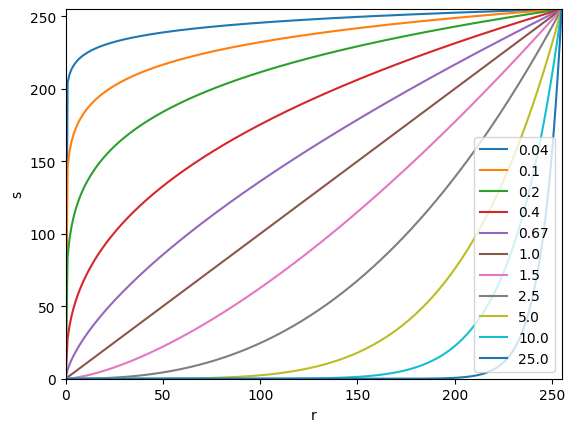

In [3]:
gammas = np.array([0.04, 0.1, 0.2, 0.4, 0.67, 1, 1.5, 2.5, 5, 10, 25])
gray_scale_norm = np.arange(256) / 255
powerLawTrans_vec = np.vectorize(s)

for gamma in gammas:
    result = powerLawTrans_vec(1, gray_scale_norm, gamma)
    result *= 255
    plt.plot(result)

plt.legend(gammas)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel('r')
plt.ylabel('s')
plt.show()

<div style="direction:rtl">
גמה < 1 תמונה בהירה יותר, שיפור האזורים הכהים ע"י פריסת אזורי האפור הכהים על תחום רחב יותר אך האזורים הבהירים יותר יפרסו על תחום צר יותר

גמה > 1 תמונה כהה יותר, שיפור האזורים הבהירים ע"י פריסת אזורי האפור הבהירים על תחום רחב יותר אך האזורים הבהירים יותר יפרסו על תחום צר יותר

קבוע c - ככל שגדול יותר כך התמונה בהירה יותר ולהפך
</div>

### Question 1.b

importing and showing the original mri image

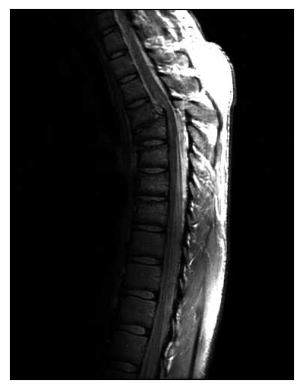

In [4]:
mri_img = cv2.imread('../mri_spine.jpg', cv2.IMREAD_GRAYSCALE) # Load the image in grayscale
plt.xticks([]), plt.yticks([])
plt.imshow(mri_img, cmap='gray')

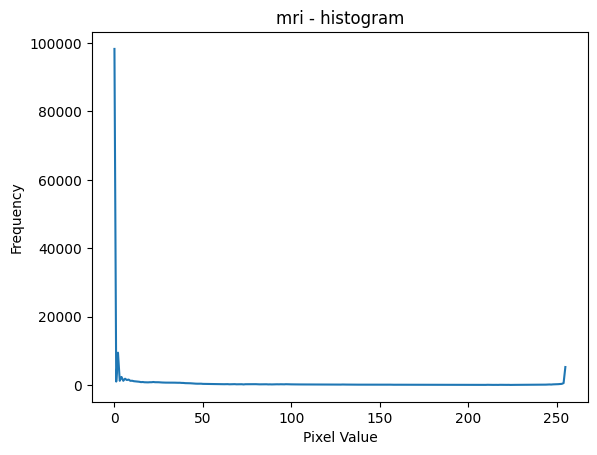

In [5]:
mri_hist, _ = np.histogram(mri_img.ravel(), 256, [0, 256])

# Plot the histogram using matplotlib
plt.plot(mri_hist)
plt.title('mri - histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

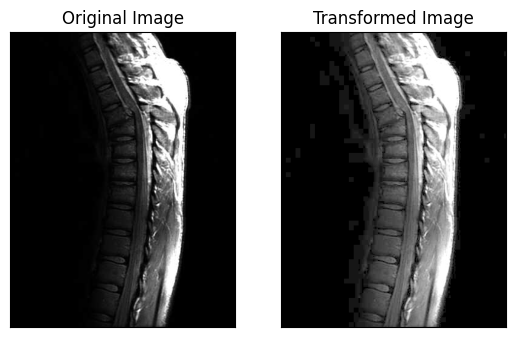

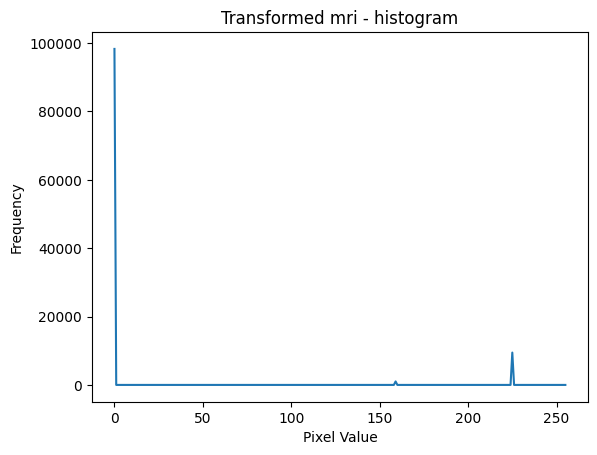

In [6]:
lut = powerLawTrans_vec(10,gray_scale_norm, 0.5) # Implementimg Look Up Table
lut *= 255 # Denormalizing
dst = cv2.LUT(mri_img,lut) # Using LUT method of opencv2
plt.subplot(121), plt.imshow(mri_img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([]) # Canceling the ticks on the y and x axes.
plt.subplot(122), plt.imshow(dst, cmap='gray')
plt.title('Transformed Image')
plt.xticks([]), plt.yticks([])
plt.show()

mriDst_hist, _ = np.histogram(dst.ravel(), 256, [0, 256])

# Plot the histogram using matplotlib
plt.plot(mriDst_hist)
plt.title('Transformed mri - histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

<div style="direction:rtl">
על פי דעתי כאשר סי הוא 10 וגמה היא 0.5 נקבל תוצאה מיטבית מישום שאת האזורים הכהים שהיו בתמונה המקורית כעת ניתן לראות בבירור.

כאשר נשתמש בעיבוד תמונה על תמונות מסוג זה אשר באות לשקף את מצב המטופל נרצה להבחין בכמה שיותר פרטים.

ניתן להבחין בהבדלים בהיסטוגרמות אשר מתבטאות במספר פיקסלים בהירים גדול יותר בתמונת המוצא לעומת התמונה המוקרית שבה מספר הפיקסלים הכהים גדול יותר.
</div>

### Question 1.c

In [7]:
def histogramEqualization(image, T):
    hist, _ = np.histogram(image.ravel(), 256, [T, 256]) # Compute the histogram
    norm_hist = hist / np.sum(hist) # Normalize the histogram
    HE_lut = np.round(np.cumsum(norm_hist) * 255) # Compute the cumulative distribution function
    for i in range(T + 1): # Retrieving original values in the Look Up Table up until the threshold
        HE_lut[i] = i
    HE_image = cv2.LUT(image, HE_lut) # Perform histogram equalization
    HE_hist, _ = np.histogram(HE_image.ravel(), 256, [0, 256]) # Compute the histogram after histogram equalization
    return HE_image, HE_lut, HE_hist


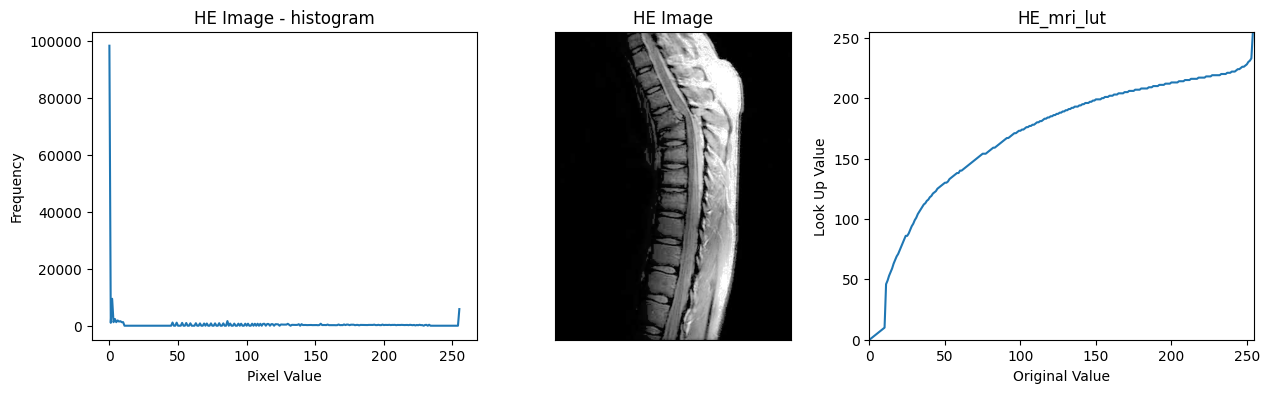

In [8]:
# mri_img = cv2.imread('../child.tif', cv2.IMREAD_GRAYSCALE)
HE_mri_img, HE_mri_lut, HE_mri_hist = histogramEqualization(mri_img, 10)

fig, (p1, p2, p3) = plt.subplots(1, 3, figsize=(15,4))

p1.plot(HE_mri_hist)
p1.set_title('HE Image - histogram')
p1.set_xlabel('Pixel Value')
p1.set_ylabel('Frequency')

p2.set_xticks([]), p2.set_yticks([]) # Canceling the ticks on the y and x axes.
p2.imshow(HE_mri_img, cmap='gray')
p2.set_title('HE Image')

p3.plot(HE_mri_lut)
p3.set_title('HE_mri_lut')
p3.set_xlim([0, 255])
p3.set_ylim([0, 255])
p3.set_xlabel('Original Value')
p3.set_ylabel('Look Up Value')

fig.subplots_adjust(wspace=0.01)

plt.show()


<div style="direction:rtl">
לא קיבלנו פילוג אחיד עקב המספר הרב של הפיקסלים השחורים, (באזורי תחומי האפור 0,1,2) וכי לא ניתן לפצל רמות אפור
</div>

### Question 1.d

C:\Users\idosh\AppData\Local\Temp\ipykernel_20776\4182557102.py:3: RuntimeWarning: invalid value encountered in divide
  norm_hist = hist / np.sum(hist) # Normalize the histogram


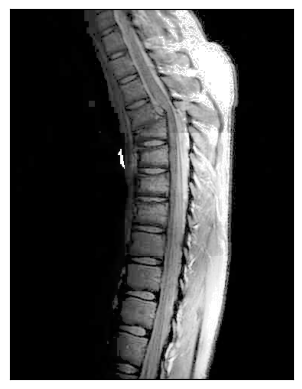

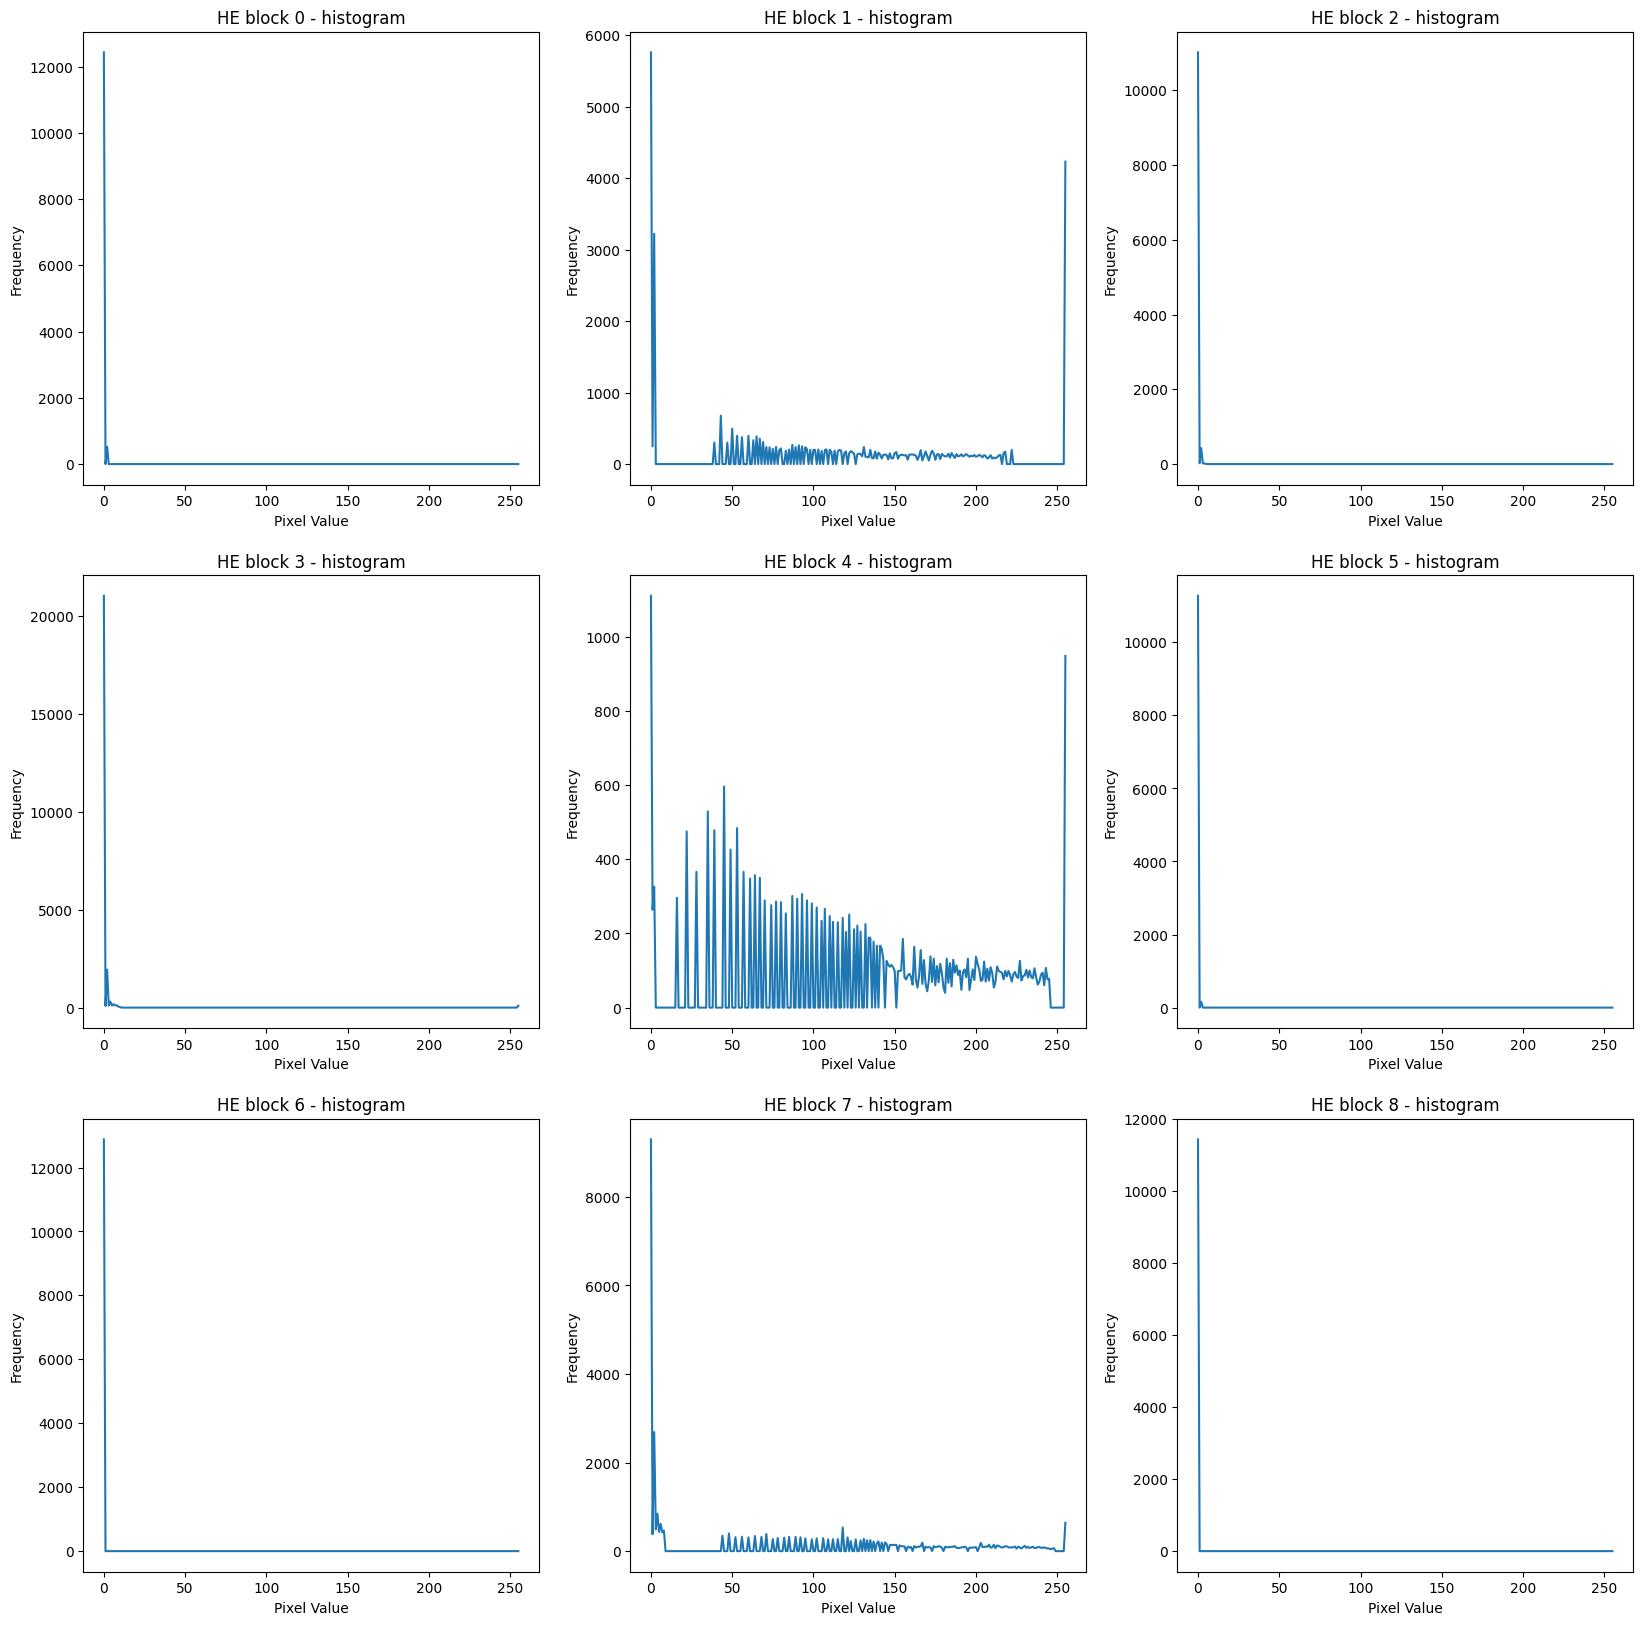

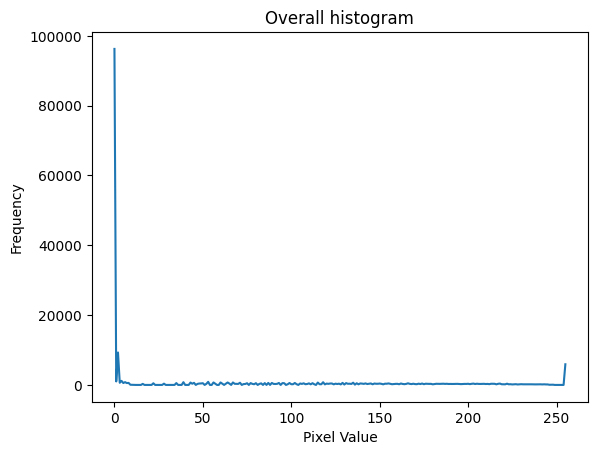

In [9]:
blocks = []

# Dividing into blocks manually to isolate the spine from the black pixels
blocks.append(mri_img[0:162, 0:80])
blocks.append(mri_img[0:162, 81:300])
blocks.append(mri_img[0:162, 301:372])
blocks.append(mri_img[163:324 , 0:150])
blocks.append(mri_img[163:324 , 151:300])
blocks.append(mri_img[163:324, 301:372])
blocks.append(mri_img[325:486, 0:80])
blocks.append(mri_img[325:486, 81:300])
blocks.append(mri_img[325:486, 301:372])

hist = []
thresholds = [255, 2, 10, 10, 2, 10, 255, 8, 255]

for i in range(9):
    blocks[i], _, temphist = histogramEqualization(blocks[i],thresholds[i])
    hist.append(temphist)

he_img = np.vstack((np.hstack((blocks[0], blocks[1], blocks[2])),
                    np.hstack((blocks[3], blocks[4], blocks[5])),
                    np.hstack((blocks[6], blocks[7], blocks[8]))))
plt.xticks([]), plt.yticks([])
plt.imshow(he_img, cmap='gray')
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i in range(9):
    current = axes[int(i / 3), int(i % 3)]
    current.plot(hist[i])
    current.set_title('HE block ' + str(i) +' - histogram')
    current.set_xlabel('Pixel Value')
    current.set_ylabel('Frequency')

fig.subplots_adjust(wspace=0.2)
plt.show()

hist, _ = np.histogram(he_img.ravel(), 256, [0, 256]) # Compute the histogram
plt.plot(hist)
plt.title('Overall histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


<div style="direction:rtl">
כאשר קבענו ערך סף יכלנו להתעלם מהפיקסלים השחורים והצלחנו לאזן יותר את הפיקסלים שחשובים לנו בתמונה (הפיקסלים המשקפים את הגב בmri)

כאשר הפעלנו את שוויון ההיסטוגרמה על כל בלוק בנפרד קיבלנו את התוצאה הטובה ביותר כי גם הצלחנו להפריד בין האזורים שלא חשובים לנו - האזורים השחורים, ולאחר מכן להביא ערך סף לכל בלוק בנפרד.
</div>

### Question 2.a.

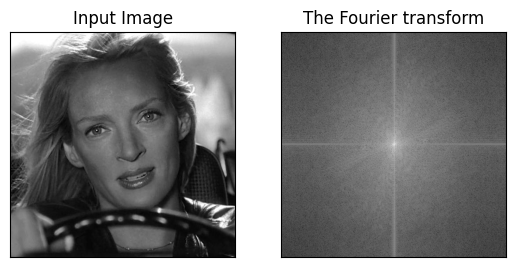

In [10]:
uma_img = cv2.imread('../Uma.jpg', cv2.IMREAD_GRAYSCALE) # Load the image
f = np.fft.fft2(uma_img) # Compute the 2D Fourier transform
fshift = np.fft.fftshift(f) # Shift the zero-frequency component to the center of the spectrum
# print(fshift)
magnitude_spectrum = np.log10(np.abs(fshift)+1) # Compute the magnitude spectrum
# print(magnitude_spectrum.shape)

plt.subplot(121), plt.imshow(uma_img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('The Fourier transform')#, plt.xticks([]), plt.yticks([])
plt.show()

### Question 2.b.

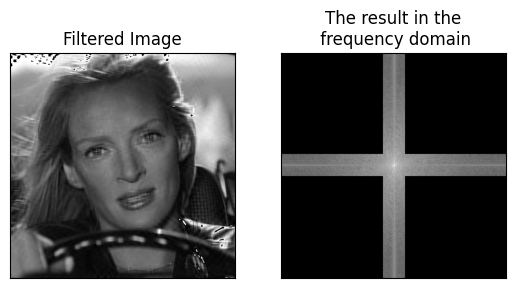

In [11]:
# Compute the Fourier Transform of the input image
f = np.fft.fft2(uma_img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)

# Create a mask to remove high-frequency components
rows, cols = uma_img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)

# Choose the 5% lowest frequencies in the x and y axes
x_cutoff = int(0.05 * rows)
y_cutoff = int(0.05 * cols)
mask[crow-x_cutoff:crow+x_cutoff, :] = 1
mask[:, ccol-y_cutoff:ccol+y_cutoff] = 1

# Apply the mask to the Fourier Transform
fshift_filtered = fshift * mask
magnitude_spectrum_filtered = np.abs(fshift_filtered)

# Apply logarithmic scaling to the magnitude spectra
magnitude_spectrum_filtered_log = np.log10(np.abs(fshift_filtered)+1)

# Compute the inverse Fourier Transform to get the filtered image
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_filtered).real
img_filtered = np.uint8(img_filtered)

# Display the original and filtered images
plt.subplot(1, 2, 1), plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum_filtered_log, cmap='gray')
plt.title('The result in the\n frequency domain'), plt.xticks([]), plt.yticks([])
plt.show()



### Question 2.c.d.e.

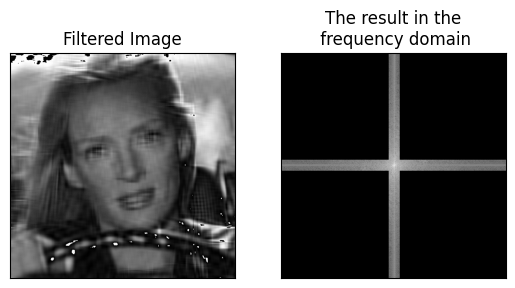

In [12]:
# Sum up the columns and rows of the magnitude spectrum
col_sums = np.sum(magnitude_spectrum, axis=0)
row_sums = np.sum(magnitude_spectrum, axis=1)

# Sort the column and row sums in descending order
sorted_col_indices = np.argsort(col_sums)[::-1]
sorted_col_sums = col_sums[sorted_col_indices]
sorted_row_indices = np.argsort(row_sums)[::-1]
sorted_row_sums = row_sums[sorted_row_indices]

# Select the top 5% most dominant columns and rows
num_cols = magnitude_spectrum.shape[1]
num_rows = magnitude_spectrum.shape[0]
num_cols_to_keep = int(num_cols * 0.05)
num_rows_to_keep = int(num_rows * 0.05)
top_col_indices = sorted_col_indices[:num_cols_to_keep]
top_row_indices = sorted_row_indices[:num_rows_to_keep]

# Create a mask of the top 5% most dominant frequencies components
mask = np.zeros_like(magnitude_spectrum)

for i in top_col_indices:
    mask[: ,i] = 1

for i in top_row_indices:
    mask[i, :] = 1

# Apply the mask to the Fourier transform of the input image
fshift_filtered = fshift * mask

magnitude_spectrum_filtered = np.log10(np.abs(fshift_filtered)+1)

# Compute the inverse Fourier transform to get the filtered image
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_filtered).real
img_filtered = np.uint8(img_filtered)

# Display the original and filtered images
plt.subplot(1, 2, 1), plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('The result in the\n frequency domain'), plt.xticks([]), plt.yticks([])
plt.show()

<div style="direction:rtl">
הייתי מצפה לקבל תוצאה טובה יותר מישום שאנו בוחרים את השורות הדומיננטיות ושיערתי שאלה משקפים את התדרים שיותר מורגשים בתמונה. אך כפי שניתן לראות קיבלנו תוצאה פחות ברורה. ניתן להסיק מכך שיש חשיבות השווה לחשיבותם של התדרים הגבוהים בנראות התמונה.
</div>

### Question 2.f.

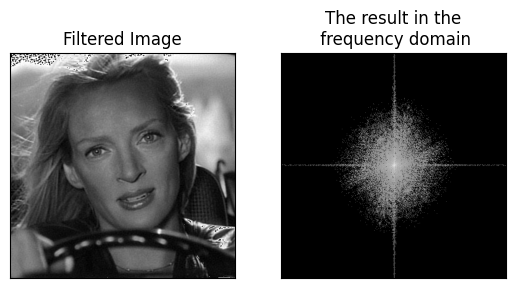

In [13]:
# Calculate the threshold value for the magnitudes
num_pixels = uma_img.shape[0] * uma_img.shape[1]
num_pixels_to_keep = int(num_pixels * 0.1)
threshold = np.sort(magnitude_spectrum.flatten())[-num_pixels_to_keep]

# Create a binary mask based on the threshold value
mask = np.zeros_like(magnitude_spectrum)
mask[magnitude_spectrum >= threshold] = 1

# Apply the mask to the Fourier transform of the input image
fshift_filtered = fshift * mask

magnitude_spectrum_filtered = np.abs(fshift_filtered)

# Apply logarithmic scaling
magnitude_spectrum_filtered_log = np.log10(np.abs(fshift_filtered)+1)

# Compute the inverse Fourier transform to get the filtered image
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_filtered).real
img_filtered = np.uint8(img_filtered)

# Display the original and filtered images
plt.subplot(1, 2, 1), plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum_filtered_log, cmap='gray')
plt.title('The result in the\n frequency domain'), plt.xticks([]), plt.yticks([])
plt.show()

<div style="direction:rtl">
ההבדל המהותי הוא שכאן בחרנו את התדרים הדומיננטים עצמם ולא את על פי הסכום של השורות/עמודות.
</div>

### Question 3.a.b.c

In [14]:
def BilinearInterpolation(dx, dy, img):

    rows, cols = img.shape

    alpha = np.float32([1 - dx, dx])
    beta = np.float32([[1 - dy],[dy]])

    out = np.zeros_like(img)

    for i in range(rows - 1):
        for j in range(cols - 1):
            M = np.float32([[img[i, j], img[i, j + 1]], [img[i + 1, j], img[i + 1, j + 1]]])
            out[i,j] = np.dot(alpha, np.dot(M, beta))

    

    return out 

In [15]:
def shift_image(dx, dy, image):

    completeShiftX = int(dx)
    completeShiftY = int(dy)

    partialShiftX = dx - completeShiftX
    partialShiftY = dy - completeShiftY

    # Complete pixels shifting

    # Determine size of output image
    height, width = image.shape
    out_height = height + abs(completeShiftX)
    out_width = width + abs(completeShiftY)
    
    # Create output image array filled with zeros
    out = np.zeros((out_height, out_width), dtype=np.float32)
    
    # Determine bounds of input image in output image
    x_min = max(0, completeShiftX)
    y_min = max(0, completeShiftY)
    x_max = min(width + completeShiftX, out_width)
    y_max = min(height + completeShiftY, out_height)
    
    # Copy overlapping region from input image to output image
    x_start = x_min - completeShiftX
    y_start = y_min - completeShiftY
    out[y_min:y_max, x_min:x_max] = image[y_start:y_max-completeShiftY, x_start:x_max-completeShiftX]
    
    # Apply bilinear interpolation to calculate output pixel values for partial pixel shifting
    out = BilinearInterpolation(partialShiftX, partialShiftY, out)
    
    return out[:height, :width] # Returning the output image in the original height and width

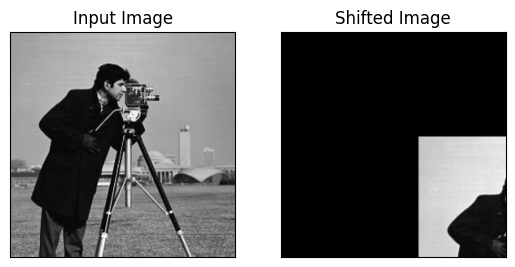

In [16]:
# Load the input image
img_CameraMan = cv2.imread('../cameraman.jpg', cv2.IMREAD_GRAYSCALE)
img_CameraMan = img_CameraMan / 255

shifted_img = shift_image(170.3, 130.8, img_CameraMan)

# Display the original and filtered images
plt.subplot(1, 2, 1), plt.imshow(img_CameraMan, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(shifted_img, cmap='gray')
plt.title('Shifted Image'), plt.xticks([]), plt.yticks([])
plt.show()


### Question 3.d.

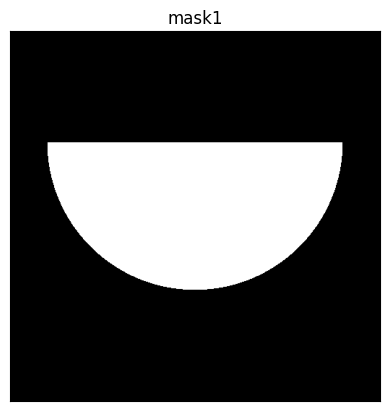

In [17]:
img_Brad = cv2.imread('../Brad.jpg', cv2.IMREAD_GRAYSCALE)

# Create a grid of coordinates
x, y = np.meshgrid(np.linspace(-1, 1, 512), np.linspace(-1, 1, 512))

# Calculate the distance from the center point of Brad's face (approximately)
r = np.sqrt(x**2 + (y + 0.4)**2)

# Create the mask
mask1 = np.zeros_like(r)
mask1[(r < 0.8) & (y >= -0.4)] = 1

# Display the mask
plt.imshow(mask1, cmap='gray')
plt.title('mask1'), plt.xticks([]), plt.yticks([])
plt.show()

### Question 3.e.

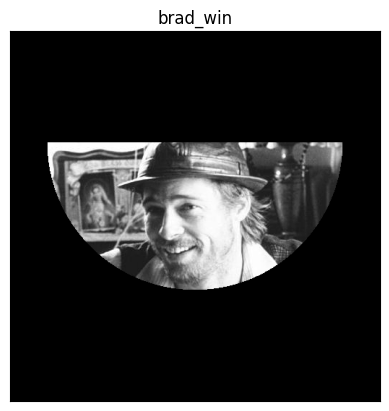

In [18]:
brad_win = np.multiply(mask1, img_Brad)

plt.imshow(brad_win, cmap='gray')
plt.title('brad_win'), plt.xticks([]), plt.yticks([])
plt.show()

### Question 3.f.

In [19]:
def rotate_img(img, angle):

    alpha = np.radians(angle)
    c = np.cos(alpha)
    s = np.sin(alpha)
    
    M = np.array([[c, s], [-s, c]])

    

    rotated_img = np.zeros_like(img)
    
    iM = np.linalg.pinv(M)
    
    rows, cols = img.shape
    
    for row in range(rows):
        for col in range(cols):
            newRow, newCol= np.dot([row, col], M)
            new_row, new_col = int(round(newRow)), int(round(newCol))

            if (new_row >= rows or new_col >= cols):
                continue
            rotated_img[new_row, new_col] = img[row, col]

    
    
    return rotated_img

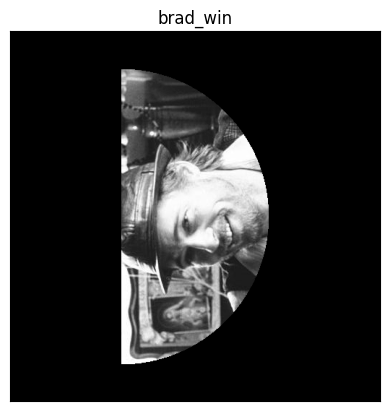

In [20]:
plt.imshow(rotate_img(brad_win, 90), cmap='gray')
plt.title('brad_win'), plt.xticks([]), plt.yticks([])
plt.show()

<div style="direction:rtl">
כאשר מסובבים את התמונה בזווית שונה מכפולה של 90 התמונה לא ממורכזת (כנראה שזה עקב טעות במימוש הפונקציה מצידי)
</div>

### Question 3.g.

In [21]:
def rotate_img_usingB(img, angle):

    alpha = np.radians(angle)
    c = np.cos(alpha)
    s = np.sin(alpha)
    
    M = np.array([[c, s], [-s, c]])

    

    rotated_img = np.zeros_like(img)
    
    iM = np.linalg.pinv(M)
    
    rows, cols = img.shape
    
    for row in range(rows):
        for col in range(cols):
            newRow, newCol= np.dot([row, col], M)
            new_row, new_col = int(round(newRow)), int(round(newCol))
            if (not newRow.is_integer() or not not newCol.is_integer()) and (new_row < rows - 1 and new_col < cols - 1):
                dx = newRow - int(round(newRow))
                dy = newCol - int(round(newCol))
                alpha = np.float32([1 - dx, dx])
                beta = np.float32([[1 - dy],[dy]])
                
                A = np.float32([[img[new_row, new_col], img[new_row, new_col + 1]], [img[new_row + 1, new_col], img[new_row + 1, new_col + 1]]])
                rotated_img[new_row, new_col] = np.dot(alpha, np.dot(A, beta))
            

            if (new_row >= rows or new_col >= cols):
                continue
            rotated_img[new_row, new_col] = img[row, col]

    
    
    return rotated_img

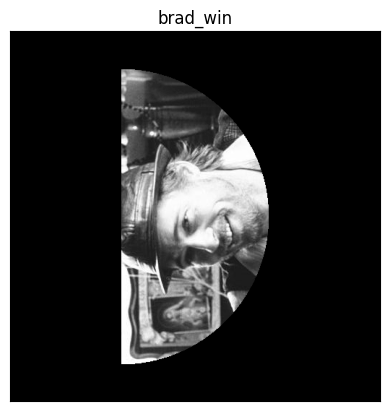

In [22]:
plt.imshow(rotate_img_usingB(brad_win, 90), cmap='gray')
plt.title('brad_win'), plt.xticks([]), plt.yticks([])
plt.show()

<div style="direction:rtl">
גם כאן מקבלים תוצאה דומה.  המקרים בהם זה לא משנה הם כאשר הזווית היא כפולה של 90.
</div>